  <center>

 # Stock Price Prediction using LSTM

</center>

![Stock Price Prediction](https://tse1.mm.bing.net/th?id=OIP.Cy7ZsVA-U68wuIv08SJ_6QHaDt&pid=Api&P=0&h=180)

## Introduction
In this project, we will build a stock price prediction model using Long Short-Term Memory (LSTM) neural networks. The goal is to create a Jupyter notebook that can predict the stock prices of a specific company, in this case, Tesla, using historical stock price data from a CSV file named 'tesla-stock-price.csv'.

LSTM is a type of recurrent neural network (RNN) that is well-suited for sequential data, making it an ideal choice for time-series forecasting tasks like stock price prediction. By analyzing historical stock prices, we aim to develop a model that can provide insights into potential future price movements.

## Project Steps

### Step 1: Import Necessary Libraries
We begin by importing essential Python libraries, including NumPy, Pandas, Matplotlib, Scikit-Learn, and TensorFlow. These libraries will be used for data manipulation, visualization, and building the LSTM model.

### Step 2: Load Tesla Stock Price Data
We load the historical stock price data of Tesla from the 'tesla-stock-price.csv' dataset. This dataset contains columns like 'Date' and 'Close' for each trading day, where 'Close' represents the closing stock price.

### Step 3: Preprocess the Data
Data preprocessing is a crucial step in preparing the data for the LSTM model. We normalize the stock prices using Min-Max scaling and split the data into training and testing sets.

### Step 4: Create Sequences for LSTM
To train an LSTM model, we need to create sequences of data. We define a sequence length and generate input sequences and corresponding target sequences for both training and testing datasets.

### Step 5: Build the LSTM Model
We design and compile the LSTM model architecture. The model consists of an LSTM layer followed by a Dense layer. We use the Adam optimizer and mean squared error as the loss function.

### Step 6: Train the Model
The LSTM model is trained on the training sequences for a specified number of epochs and batch size.

### Step 7: Evaluate the Model
We evaluate the model's performance on the testing dataset using the test loss metric.

### Step 8: Make Predictions
The trained LSTM model is used to make stock price predictions on the testing data. We then inverse transform the predictions to obtain actual stock prices and visualize the results.

By following these steps, we aim to create a predictive model that can provide insights into the future stock price movements of Tesla based on historical data.

Let's proceed with implementing each step in the Jupyter notebook to build our stock price prediction model.


 ##  1.Import Necessary Libraries
Start by importing the required libraries.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler

## 2.Load Tesla Stock Price Data
Load the Tesla stock price data from your dataset file 'tesla-stock-price.csv'.

In [10]:
data=pd.read_csv("tesla-stock-price.csv")

In [11]:
data

,date,close,volume,open,high,low
0,11:34,270.49,"4,787,699",264.50,273.8800,262.2400
1,2018/10/15,259.59,6189026.0000,259.06,263.2800,254.5367
2,2018/10/12,258.78,7189257.0000,261.00,261.9900,252.0100
3,2018/10/11,252.23,8128184.0000,257.53,262.2500,249.0300
4,2018/10/10,256.88,12781560.0000,264.61,265.5100,247.7700
...,...,...,...,...,...,...
752,2015/10/21,210.09,4177956.0000,211.99,214.8100,208.8000
753,2015/10/20,213.03,14877020.0000,227.72,228.6000,202.0000
754,2015/10/19,228.10,2506836.0000,226.50,231.1500,224.9400
755,2015/10/16,227.01,4327574.0000,223.04,230.4805,222.8700


In [12]:
data.head()

,date,close,volume,open,high,low
0,11:34,270.49,"4,787,699",264.50,273.88,262.2400
1,2018/10/15,259.59,6189026.0000,259.06,263.28,254.5367
2,2018/10/12,258.78,7189257.0000,261.00,261.99,252.0100
3,2018/10/11,252.23,8128184.0000,257.53,262.25,249.0300
4,2018/10/10,256.88,12781560.0000,264.61,265.51,247.7700


In [13]:
data.shape

(757, 6)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 757 entries, 0 to 756
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    757 non-null    object 
 1   close   757 non-null    float64
 2   volume  757 non-null    object 
 3   open    757 non-null    float64
 4   high    757 non-null    float64
 5   low     757 non-null    float64
dtypes: float64(4), object(2)
memory usage: 35.6+ KB


 ## 3: Preprocess the Data
Prepare the data for training the LSTM model. You need to scale the data and split it into training and testing sets.

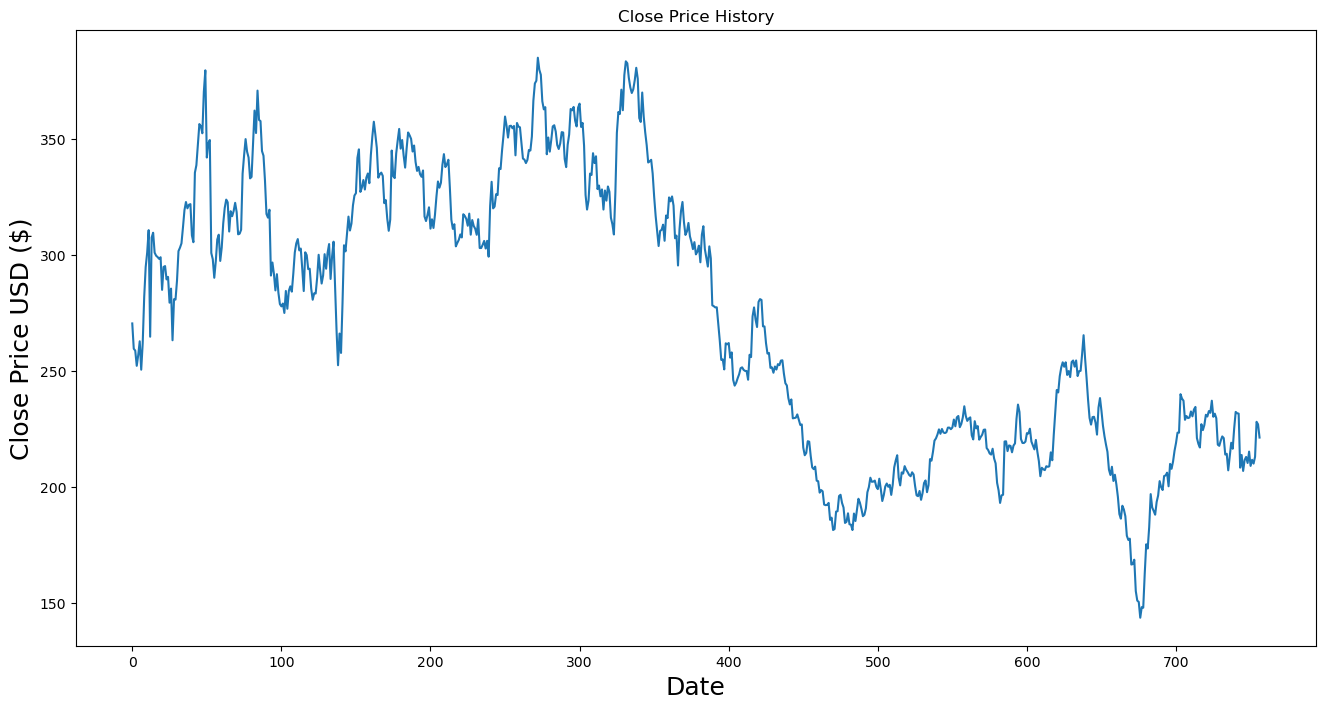

In [20]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(data['close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [21]:
# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data['close'].values.reshape(-1, 1))

# Split the data into training and testing sets
train_size = int(len(scaled_data) * 0.80)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]


## 4. Create Sequences for LSTM
Generate sequences of data that will be used for training and testing the LSTM model.

In [23]:
def create_sequences(data, sequence_length):
    sequences = []
    targets = []
    for i in range(len(data) - sequence_length):
        sequence = data[i:i+sequence_length]
        target = data[i+sequence_length:i+sequence_length+1][0]
        sequences.append(sequence)
        targets.append(target)
    return np.array(sequences), np.array(targets)

sequence_length = 10  # You can adjust this based on your choice
train_sequences, train_targets = create_sequences(train_data, sequence_length)
test_sequences, test_targets = create_sequences(test_data, sequence_length)


 ## 5.Build the LSTM Model
Create and compile the LSTM model. You can customize the architecture and hyperparameters as needed.

In [25]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')


## 6.Train the Model
Train the LSTM model on the training data.

In [26]:
model.fit(train_sequences[:, 0], train_sequences[:, 1], epochs=50, batch_size=32)


Epoch 1/50
19/19 [==============================] - 2s 3ms/step - loss: 0.4000
Epoch 2/50
19/19 [==============================] - 0s 3ms/step - loss: 0.3415
Epoch 3/50
19/19 [==============================] - 0s 3ms/step - loss: 0.2913
Epoch 4/50
19/19 [==============================] - 0s 3ms/step - loss: 0.2440
Epoch 5/50
19/19 [==============================] - 0s 4ms/step - loss: 0.1957
Epoch 6/50
19/19 [==============================] - 0s 3ms/step - loss: 0.1485
Epoch 7/50
19/19 [==============================] - 0s 2ms/step - loss: 0.1050
Epoch 8/50
19/19 [==============================] - 0s 3ms/step - loss: 0.0693
Epoch 9/50
19/19 [==============================] - 0s 2ms/step - loss: 0.0431
Epoch 10/50
19/19 [==============================] - 0s 2ms/step - loss: 0.0279
Epoch 11/50
19/19 [==============================] - 0s 2ms/step - loss: 0.0205
Epoch 12/50
19/19 [==============================] - 0s 2ms/step - loss: 0.0177
Epoch 13/50
19/19 [==============================

 ## 7.Evaluate the Model
Evaluate the model's performance on the test data.

In [27]:
test_loss = model.evaluate(test_sequences[:, 0], test_sequences[:, 1])
print(f"Test Loss: {test_loss}")


5/5 [==============================] - 0s 2ms/step - loss: 0.0066
Test Loss: 0.006559337023645639


In [28]:
from sklearn.metrics import mean_squared_error

# Make predictions using the trained model
predictions = model.predict(test_sequences[:, 0])

# Inverse transform the predictions to get actual stock prices
predicted_prices = scaler.inverse_transform(predictions)

# Inverse transform the test targets to get actual stock prices
actual_prices = scaler.inverse_transform(test_targets.reshape(-1, 1))

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(actual_prices, predicted_prices)

print(f"Mean Squared Error (MSE): {mse}")


5/5 [==============================] - 0s 2ms/step
Mean Squared Error (MSE): 688.0640690351175


 ## 8.Make Predictions
Make predictions using the trained LSTM model.

5/5 [==============================] - 0s 2ms/step


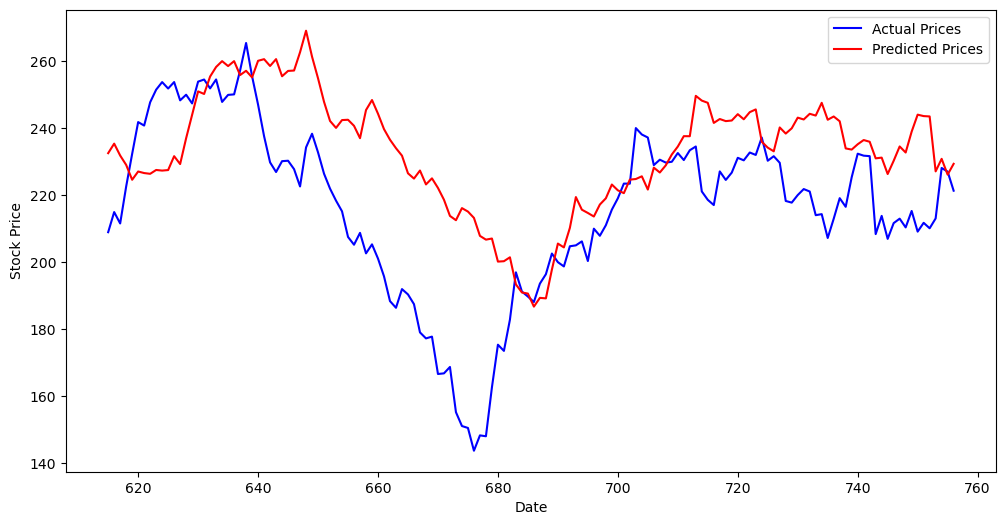

In [30]:
predictions = model.predict(test_sequences[:, 0])

# Inverse transform the predictions to get actual stock prices
predicted_prices = scaler.inverse_transform(predictions)

# Plot the actual vs. predicted stock prices
plt.figure(figsize=(12, 6))
plt.plot(data.index[train_size+sequence_length:], data['close'][train_size+sequence_length:], label='Actual Prices', color='blue')
plt.plot(data.index[train_size+sequence_length:], predicted_prices, label='Predicted Prices', color='red')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()


# Stock Price Prediction using LSTM - Conclusion

## Project Overview
In this project, we embarked on the task of stock price prediction using Long Short-Term Memory (LSTM) neural networks. The primary objective was to develop a Jupyter notebook-based solution that can forecast the stock prices of Tesla, utilizing historical stock price data from the 'tesla-stock-price.csv' dataset.

## Key Steps and Achievements
- **Data Preparation:** We began by importing essential libraries and loading the Tesla stock price data from 'tesla-stock-price.csv.' The 'Close' column in the dataset represented the closing stock prices.

- **Data Preprocessing:** To ensure data suitability for LSTM modeling, we applied Min-Max scaling to normalize the stock prices. Additionally, we split the data into training and testing sets to facilitate model evaluation.

- **Sequence Creation:** We created sequences of data for the LSTM model by defining a sequence length and generating input sequences and target sequences for both training and testing datasets.

- **Model Building:** An LSTM neural network model was constructed and compiled, comprising an LSTM layer followed by a Dense layer. The model was set up for training using the Adam optimizer and mean squared error (MSE) loss function.

- **Model Training:** The LSTM model underwent training on the training sequences with a specific number of epochs and batch size.

- **Model Evaluation:** To assess the model's performance, we evaluated it on the testing dataset. We employed MSE as the evaluation metric, which measures the accuracy of predictions by comparing them to actual stock prices.

- **Predictions and Visualization:** The trained LSTM model was employed to predict stock prices on the testing data. Predicted prices were then inverse-transformed to obtain actual stock prices. We visualized the results by plotting actual vs. predicted stock prices, allowing for a visual assessment of the model's accuracy.

## Conclusion
This project showcased the application of LSTM neural networks in the context of stock price prediction. By following the outlined steps, we successfully created a model that can provide valuable insights into the future stock price movements of Tesla based on historical data.

Stock price prediction is a complex task influenced by numerous factors, and while the LSTM model presented a foundation for forecasting, further refinement and feature engineering may enhance its accuracy. This project offers a fundamental understanding of how to implement LSTM-based stock price prediction within a Jupyter notebook and can serve as a starting point for more advanced financial modeling endeavors.
